<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula08a_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

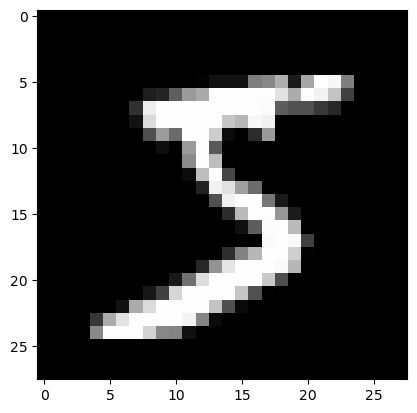

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [27]:
test_images.shape, len(test_labels), test_labels

((10000, 28, 28), 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [28]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [29]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [30]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [31]:
(train_images.shape, train_labels), (test_images.shape, test_labels)

(((60000, 784), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 ((10000, 784), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [32]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2588 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1063 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0697 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0510 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0380 - accuracy: 0.9890


In [33]:
predicted = model.predict(test_images[0:1])
predicted[0]

1/1 [==============================] - 0s 49ms/step


array([1.2623558e-07, 2.4960499e-08, 4.5566132e-05, 9.2926319e-04,
       1.4257902e-10, 1.5125836e-07, 3.9814853e-12, 9.9902070e-01,
       1.4566469e-06, 2.6700191e-06], dtype=float32)

In [34]:
predicted[0].argmax()

7

In [35]:
predicted[0][7]

0.9990207

In [36]:
test_labels[0]

7

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9771
test_acc: 0.9771000146865845


In [38]:
from keras.utils import to_categorical
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [39]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(y.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    return np.array([(a == np.max(a)) for a in probabilities])

modelo = RedeNeural()
modelo.fit(train_images, train_labels_hot)
ypred = modelo.predict(test_images)
accuracy_score(test_labels_hot, ypred)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2619 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1069 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0708 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0509 - accuracy: 0.9846
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.98

In [40]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = RedeNeural()
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2647 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1069 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0709 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0510 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.9789

In [41]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [42]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

modelo = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2636 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1053 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0698 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.9787

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.astype("float32") / 255

from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2633 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1077 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0702 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0504 - accuracy: 0.9851
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.9796

In [45]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [46]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2199 - accuracy: 0.9330
Epoch 2/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0742 - accuracy: 0.9770
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0433 - accuracy: 0.9864
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9853

In [58]:
import wget
import gzip
import os

# URL do arquivo zip
url = "https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz"

# Caminho onde o arquivo zip será baixado
download_path = "mnist_png.tar.gz"

# Baixa o arquivo zip
#wget.download(url, download_path)

#unzip na mão (não consegui extrair usando o gzip daqui :())

# Remove o arquivo zip
#os.remove(download_path)

# Agora o diretório "mnist_png" deve conter as pastas "testing" e "training" com as imagens PNG do MNIST

In [65]:
import os
import numpy as np
from PIL import Image

def load_mnist(path, kind='train'):
    """Carrega os dados do MNIST do caminho especificado"""
    labels_path = os.path.join(path, f'{kind}-labels.idx1-ubyte')
    images_path = os.path.join(path, f'{kind}-images.idx3-ubyte')
    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    return images, labels

# Carrega os dados do MNIST
X_train, y_train = load_mnist('mnist', 'train')
X_test, y_test = load_mnist('mnist', 't10k')

# Normaliza os valores de pixel para o intervalo [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Divisão dos dados em conjunto de validação e treinamento
X_val, y_val = X_train[-10000:], y_train[-10000:]
X_train, y_train = X_train[:-10000], y_train[:-10000]


In [66]:
modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
accuracy_score(y_test, ypred)

Epoch 1/5
391/391 [==============================] - 7s 16ms/step - loss: 1.6065 - accuracy: 0.5343
Epoch 2/5
391/391 [==============================] - 7s 17ms/step - loss: 0.4777 - accuracy: 0.8619
Epoch 3/5
391/391 [==============================] - 7s 19ms/step - loss: 0.3456 - accuracy: 0.8991
Epoch 4/5
391/391 [==============================] - 7s 19ms/step - loss: 0.2850 - accuracy: 0.9159
Epoch 5/5
313/313 [==============================] - 1s 4ms/step


0.9403